<a href="https://colab.research.google.com/github/gustavogrds/TIC_01_2023/blob/main/ACD_T4_Regressao_Linear_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

 # **Regressão Linear (Lab)**
 ---

# **Regressão Linear**
 


# Caso: **Como estimar a emissão de gases CO2 de um motor?** 

Empregue os dados da URL: https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv

Neste Lab você vai estimar as emissões de CO2 de modelos de veículos a partir de suas características empregando modelos de regressão linear e avaliar esses modelos. 

### `FuelConsumption.csv`:
**`FuelConsumption.csv`**, contém informações do consumo de combustível, outras características dos modelos e as emissões de dióxido de carbono para vários novos veículos comerciais leves no Canadá.

- **MODELYEAR** ex. 2014
- **MAKE** ex. Acura
- **MODEL** ex. ILX
- **VEHICLE CLASS** ex. SUV
- **ENGINE SIZE** ex. 4.7
- **CYLINDERS** ex. 6
- **TRANSMISSION** ex. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** ex. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** ex. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** ex. 9.2
- **CO2 EMISSIONS (g/km)** ex. 182 


# Regressão Linear. Vamos lembrar?

Um modelo linear aproxima o valor de variável objetivo $Y$ a partir de uma combinação linear das variáveis preditoras $X$. 

$  \widehat Y = a_0 + a_{1} X_{1} + a_{2} X_{2} + ... + a_{n} X_{n} $ 
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat Y$ para $X=0$ (*intercept*). 






## Uma regressão linear simples

Vamos começar com uma regressão simples de valores aleatórios apenas para você se familiarizar com a construção do modelo. 

In [ ]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Gerando uma amostra de 50 valores "aleatórios" a partir de uma função linear.    

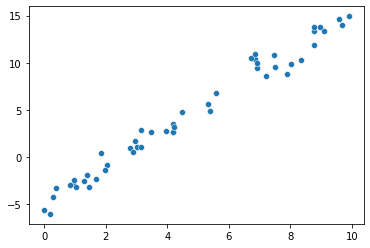

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x, y)

Podemos ainda traçar uma linha de aproximação linear com a função `sns.lmplot()`.

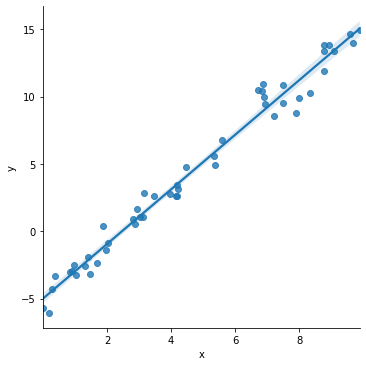

           x          y
0   4.170220   2.653267
1   7.203245   8.561284
2   0.001144  -5.668959
3   3.023326   1.033987
4   1.467559  -3.182193
5   0.923386  -2.918812
6   1.862602   0.385006
7   3.455607   2.653259
8   3.967675   2.743514
9   5.388167   4.888706
10  4.191945   2.636732
11  6.852195  10.396845
12  2.044522  -0.860147
13  8.781174  11.925353
14  0.273876  -4.261333
15  6.704675  10.509605
16  4.173048   3.466255
17  5.586898   6.791000
18  1.403869  -1.892091
19  1.981015  -1.390220
20  8.007446   9.872373
21  9.682616  14.015889
22  3.134242   1.059589
23  6.923226   9.433076
24  8.763892  13.366766
25  8.946067  13.823235
26  0.850442  -3.013528
27  0.390548  -3.333763
28  1.698304  -2.357790
29  8.781425  13.815718
30  0.983468  -2.520134
31  4.211076   3.124060
32  9.578895  14.646309
33  5.331653   5.587734
34  6.918771   9.969172
35  3.155156   2.830129
36  6.865009  10.915594
37  8.346257  10.296017
38  0.182883  -6.078348
39  7.501443   9.498420
40  9.888611  14

In [ ]:
df = pd.DataFrame({'x':x,'y':y}) 
sns.lmplot('x','y',data=df)
plt.show()

print(df)


## Construindo o modelo linear, `sm.ols(formula = , data= )`

Um conjunto de dados é informado e o parâmetro `formula` indica as variáveis objetivo e preditoras.

````
                                                              formula = 'y ~ x' 
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + b_1 x $$



In [ ]:
model = sm.ols(formula='y ~ x', data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           5.71e-42
Time:                        19:20:51   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

E desse modo a aproximação linear é dada por:

$$ y = -4.9986 + 2.0272 x $$

Empregamos então o modelo para estimar os valores de $y$, isto é $\bar y$, a partir do modelo linear. Podemos então comparar os valores de $y$ e $\bar y$ (`predicted`). 


In [ ]:
df['predicted'] = result.predict(df.x)

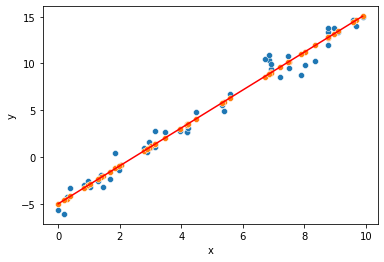

In [ ]:
sns.scatterplot('x','y',data=df)
sns.scatterplot('x','predicted',data=df)
sns.lineplot('x','predicted',data=df,color='red')
plt.show()

## Caso: **Como estimar a emissão de gases CO2 de um motor?** 

Empregue os dados da URL: https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv


# Exercício. Explorando os dados.

Acesse e explore os dados **FuelConsumptionCo2.csv**. Você pode querer verificar os imports, mas eles já devem estar feitos se você executou os código anteriores. Caso contrário refaça aqui.

In [ ]:
# Insira aqui seu código

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  

df = pd.read_csv("https://meusite.mackenzie.br/rogerio/TIC/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Exercício. `CO2EMISSIONS`

Explore a relação das demais variáveis com `CO2EMISSIONS`

### DICA: 
Embora o `sns.scatterplot(x,y)` possa ser usado para verificar a relação de cada par de variáveis, o `sns.pairplot(df)` permite você criar vários `scatterplots` simultâneos. 



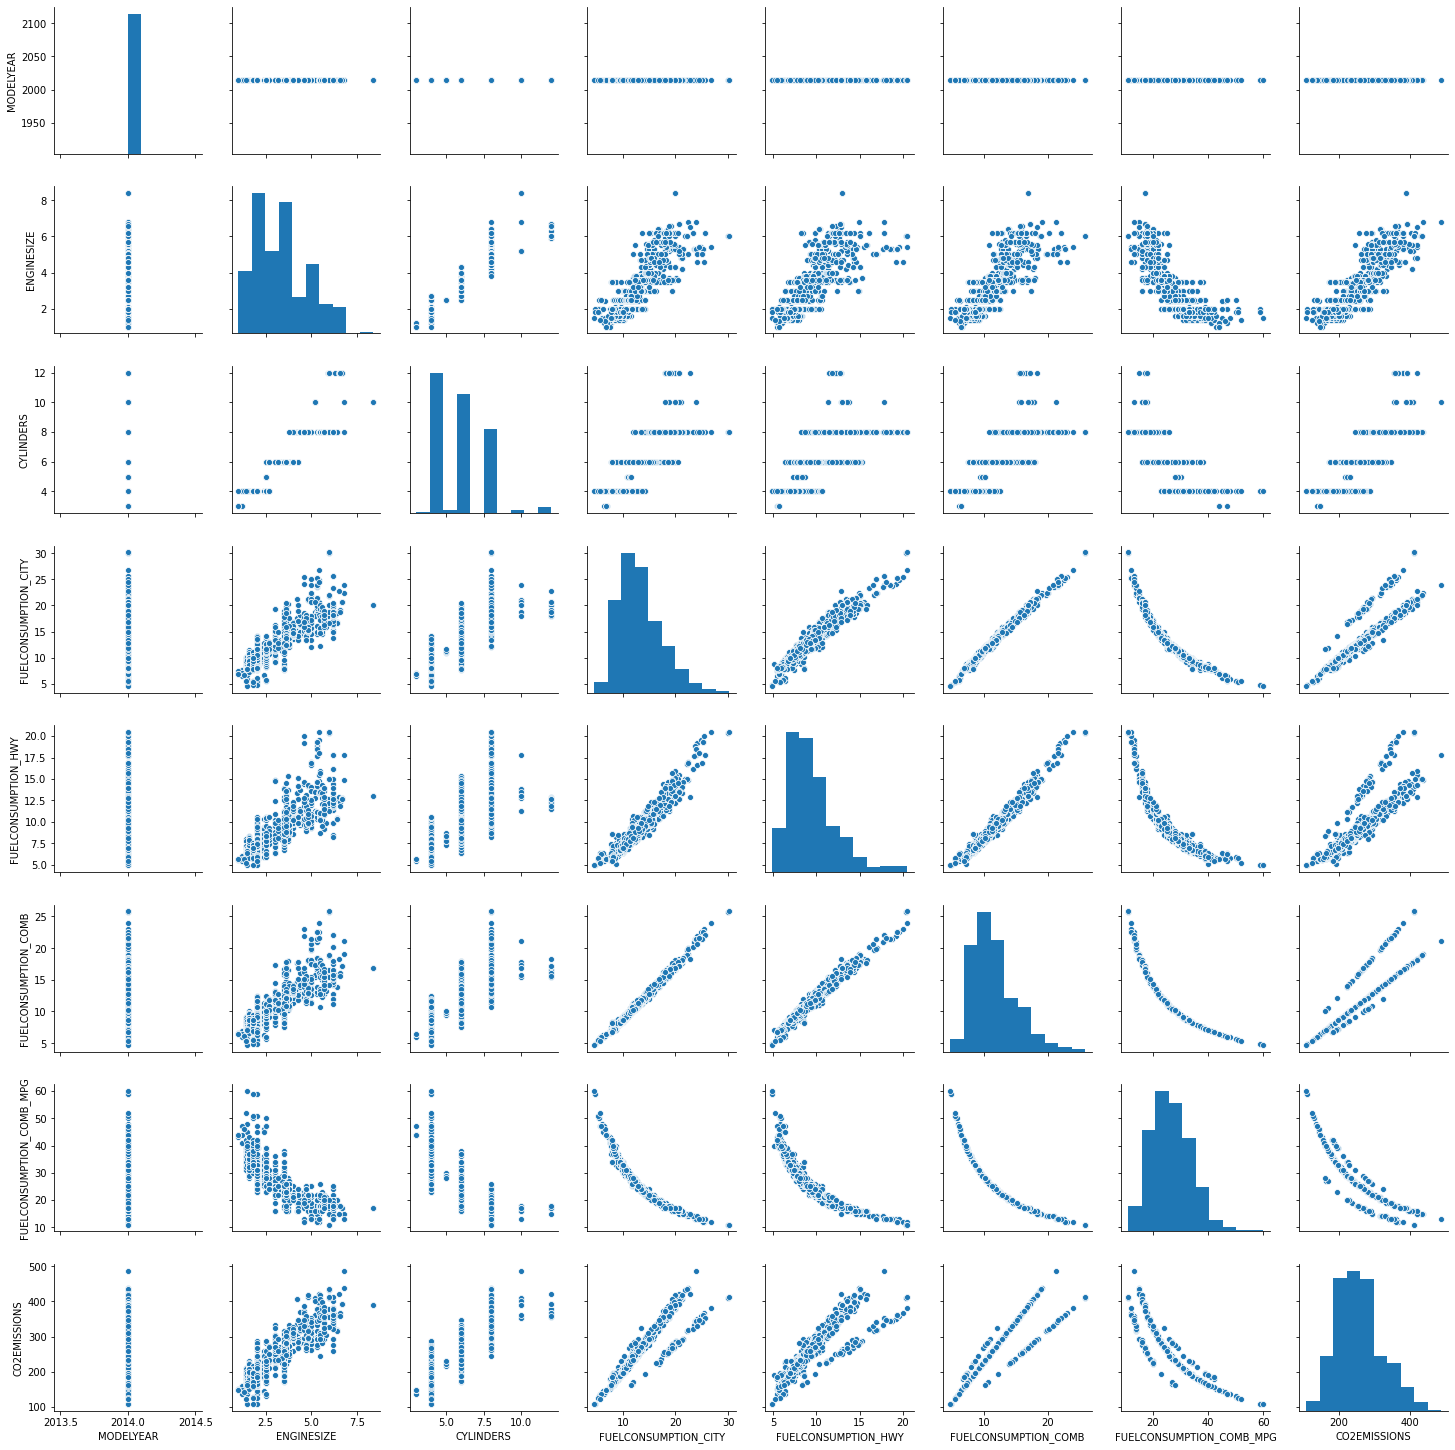

In [ ]:
# Insira aqui seu código

sns.pairplot(df)

# Exercício. `FUELCONSUMPTION_COM` X `CO2EMISSIONS`
Explore a relação de `FUELCONSUMPTION_COM` com  `CO2EMISSIONS`

### DICA: 
Embora o `sns.scatterplot(x,y)` possa ser usado para verificar a relação de cada par de variáveis, o `sns.lmplot('x','y',data=df)` vai ainda permitir você visualizar a linha de tendência dos dados. 



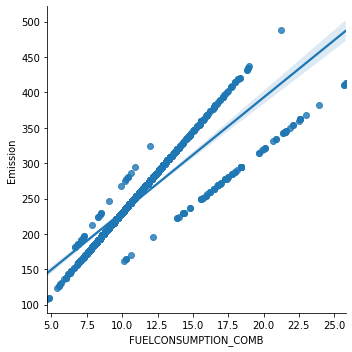

In [ ]:
# Insira aqui seu código

sns.lmplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', data=df)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# Exercício. Regressão Simples

Crie um modelo regressão para obter `CO2EMISSIONS` a partir de `FUELCONSUMPTION_COMB`

### DICA: 
Lembre-se 

  `model = sm.ols(formula='y ~ x', data=df)`



In [ ]:
# Insira aqui seu código

model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB', data=df)

# Exercício. Resultados
Verifique os resultados do modelo obtido

### DICA: 
Lembre-se 

```
result = model.fit()
print(result.summary())
```


In [ ]:
# Insira aqui seu código

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4153.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:40:20   Log-Likelihood:                -5092.7
No. Observations:                1067   AIC:                         1.019e+04
Df Residuals:                    1065   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               68.3871 

# Exercício. Modelo final

...insira no texto abaixo os coeficientes obtidos.


 



$$ \widehat{CO2EMISSIONS} = 68.38 + 16.22 \times FUELCONSUMPTIONCOMB $$
 



# Exercício. Predição
A partir do seu modelo empregue a função `result.predict(x)` para estimar a emissão de gases por veículos novos que apresentam consumo de combustível no valor de 4 e 28, e que não existem nos dados originais. 

### DICA:

A entrada x deve ser um dataframe no mesmo formato e nome dos atributos de entrada no modelo. 
 



In [ ]:
x = pd.DataFrame({'FUELCONSUMPTION_COMB': [4,28]})
result.predict(x)

0    133.267015
1    522.546301
dtype: float64

# Exercício. Verificação Visual **(RESOLVIDO)**

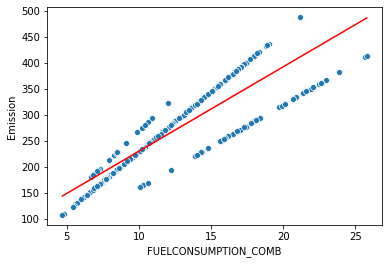

In [ ]:
df['predicted'] = result.predict()

sns.scatterplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', data=df)
sns.lineplot('FUELCONSUMPTION_COMB', 'predicted', data=df, color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()




# Exercício. Tudo junto...

Coloque todo o código empregado para estimar as emissões de `FUELCONSUMPTION_COMB` aqui.

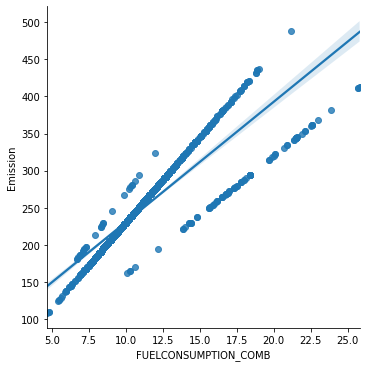

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     4153.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:43:24   Log-Likelihood:                -5092.7
No. Observations:                1067   AIC:                         1.019e+04
Df Residuals:                    1065   BIC:                         1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               68.3871 

In [ ]:
# Insira aqui seu código

# explora a relação linear (ou outra) dos dados
sns.lmplot('FUELCONSUMPTION_COMB', 'CO2EMISSIONS', data=df)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

# define o modelo
model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB', data=df)

# calcula o modelo e mostra os resultados
result = model.fit()
print(result.summary())

# faz uma previsão
x = pd.DataFrame({'FUELCONSUMPTION_COMB': [4,28]})
print(result.predict(x))



# Exercício. Regressão Múltipla

Faça agora um modelo de regressão múltipla para estimar as emissões de CO2 a partir de `FUELCONSUMPTION_COMB` e `ENGINESIZE`. 

Faça então uma predição de emissões para um veículo com `FUELCONSUMPTION_COMB` = 10 e `ENGINESIZE` = 2. 

In [ ]:
# Insira aqui seu código

# define o modelo
model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE', data=df)

# calcula o modelo e mostra os resultados
result = model.fit()
print(result.summary())

# faz uma previsão
x = pd.DataFrame({'FUELCONSUMPTION_COMB': [10], 'ENGINESIZE': [2]})
print(result.predict(x))


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3220.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        19:50:57   Log-Likelihood:                -4898.4
No. Observations:                1067   AIC:                             9803.
Df Residuals:                    1064   BIC:                             9818.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               78.3068 

### Solução: O modelo obtido é

$$ \widehat{CO2EMISSIONS} = 78.30 + 19.49 \times ENGINESIZE + 9.73 \times FUELCONSUMPTIONCOMB $$

E apresenta Coeficiente de Determinação e p-values

$$ R^2 = 0.858 $$
$$ p-values < 0.05 $$

melhor que os modelos unidimensionais.

# Exercício. Regressão com Atributos Categóricos

Faça agora um modelo de Regressão Múltipla empregando o atributo categórico `VEHICLECLASS`. Sendo um atributo categórico você deve fazer o `hot encode` antes.

DICA: (IMPORTANTE) ajuste o nome das colunas, não são aceitos para fórmula do statsmodel atributos com ' ' (brancos) no nome das colunas.

In [ ]:
pd_dummies = pd.get_dummies(df['VEHICLECLASS'], prefix='VEHICLECLASS')
df = pd.concat([df,pd_dummies],axis=1)
df.iloc[0]

MODELYEAR                                   2014
MAKE                                       ACURA
MODEL                                        ILX
VEHICLECLASS                             COMPACT
ENGINESIZE                                     2
CYLINDERS                                      4
TRANSMISSION                                 AS5
FUELTYPE                                       Z
FUELCONSUMPTION_CITY                         9.9
FUELCONSUMPTION_HWY                          6.7
FUELCONSUMPTION_COMB                         8.5
FUELCONSUMPTION_COMB_MPG                      33
CO2EMISSIONS                                 196
VEHICLECLASS_COMPACT                           1
VEHICLECLASS_FULL-SIZE                         0
VEHICLECLASS_MID-SIZE                          0
VEHICLECLASS_MINICOMPACT                       0
VEHICLECLASS_MINIVAN                           0
VEHICLECLASS_PICKUP TRUCK - SMALL              0
VEHICLECLASS_PICKUP TRUCK - STANDARD           0
VEHICLECLASS_SPECIAL

In [ ]:
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.replace(" ", "")

In [ ]:
formula = 'CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE'
for c in [x for x in df.columns if x.find('VEHICLECLASS_') >= 0]:
  formula = formula + ' + ' + c
print(formula)  

CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE + VEHICLECLASS_COMPACT + VEHICLECLASS_FULL_SIZE + VEHICLECLASS_MID_SIZE + VEHICLECLASS_MINICOMPACT + VEHICLECLASS_MINIVAN + VEHICLECLASS_PICKUPTRUCK_SMALL + VEHICLECLASS_PICKUPTRUCK_STANDARD + VEHICLECLASS_SPECIALPURPOSEVEHICLE + VEHICLECLASS_STATIONWAGON_MID_SIZE + VEHICLECLASS_STATIONWAGON_SMALL + VEHICLECLASS_SUBCOMPACT + VEHICLECLASS_SUV_SMALL + VEHICLECLASS_SUV_STANDARD + VEHICLECLASS_TWO_SEATER + VEHICLECLASS_VAN_CARGO + VEHICLECLASS_VAN_PASSENGER


In [ ]:
model = sm.ols(formula='CO2EMISSIONS ~ FUELCONSUMPTION_COMB + ENGINESIZE + VEHICLECLASS', data=df)

result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     414.5
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:02:26   Log-Likelihood:                -4850.3
No. Observations:                1067   AIC:                             9737.
Df Residuals:                    1049   BIC:                             9826.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

# Exercício. Atributos Categóricos diretos

A biblioteca `statsmodel` permite empregar atributos categóricos diretamente para a regressão linear. Ela 
 faz internamente o `hot encode`. Faça a regressão linear anterior informando o atributo `VEHICLECLASS` diretamente, sem o `hot encode`. Existe diferenças com relação ao  resultado anterior? Qual?

In [ ]:
model = sm.ols(formula=formula, data=df)

result = model.fit()
print(result.summary())


O modelo é o mesmo, mas emprega uma atributo 'hot encode' a menos (veja que isso faz sentido, o atributos `sexo` (M e F) pode ser representado com um único `hot encode`, uma a menos do que os valores do atributo).